**Data regarding Netflix shows**

In [77]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
shows=pd.read_csv(r'C:\Users\asus\Desktop\Machine Learning\Netflix_Shows.csv',encoding='ISO-8859-1')
shows

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


In [79]:
shows.duplicated().sum()

500

*Checking number of duplicates*

In [80]:
shows=shows[shows.duplicated()==False]
shows

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,NaN,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,NaN,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82


*Removed rows in which all the columns are same*

In [81]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   ratingDescription  500 non-null    int64  
 4   release year       500 non-null    int64  
 5   user rating score  256 non-null    float64
 6   user rating size   500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 31.2+ KB


In [82]:
shows.isnull().sum()

title                  0
rating                 0
ratingLevel           33
ratingDescription      0
release year           0
user rating score    244
user rating size       0
dtype: int64

*This shows that ratingLevel (object type) and user rating score (float type) have many null values which needs to be corrected*

In [83]:
shows['ratingLevel'].value_counts().head()

Parents strongly cautioned. May be unsuitable for children ages 14 and under.    100
Suitable for all ages.                                                            65
For mature audiences.  May not be suitable for children 17 and under.             60
General Audiences. Suitable for all ages.                                         52
Parental guidance suggested. May not be suitable for all children.                31
Name: ratingLevel, dtype: int64

*Checked for five most occuring data and filling it instead of null values in ratingLevel*

In [100]:
temp='Parents strongly cautioned. May be unsuitable for children ages 14 and under.'
shows['ratingLevel']=shows['ratingLevel'].fillna(temp)

In [102]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingDescription  500 non-null    object 
 3   ratingLevel        500 non-null    int64  
 4   release year       500 non-null    int64  
 5   user rating score  500 non-null    float64
 6   user rating size   500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 31.2+ KB


<AxesSubplot:ylabel='Density'>

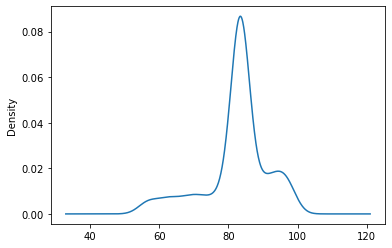

In [103]:
shows['user rating score'].dropna().plot(kind='density')

In [104]:
shows['user rating score']=shows['user rating score'].fillna(shows['user rating score'].dropna().median())

In [105]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingDescription  500 non-null    object 
 3   ratingLevel        500 non-null    int64  
 4   release year       500 non-null    int64  
 5   user rating score  500 non-null    float64
 6   user rating size   500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 31.2+ KB


*Filled null values of user rating score with their median value*

In [106]:
shows

,title,rating,ratingDescription,ratingLevel,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,83.5,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,83.5,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,83.5,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,83.5,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,83.5,82


<AxesSubplot:ylabel='rating'>

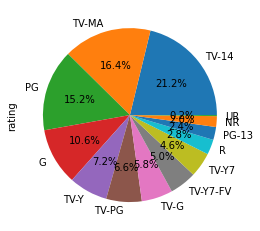

In [107]:
shows['rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')

*We can see that Netflix released maximum TV-14 shows*

<AxesSubplot:>

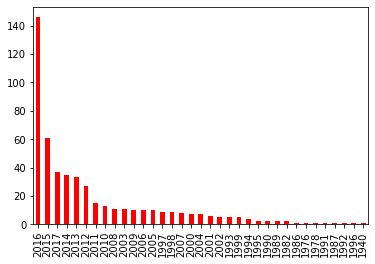

In [108]:
shows['release year'].value_counts().plot(kind='bar',color='red')

*Maximum number of shows were released in 2016*

In [109]:
shows_2016=shows[shows['release year']==2016]

<AxesSubplot:>

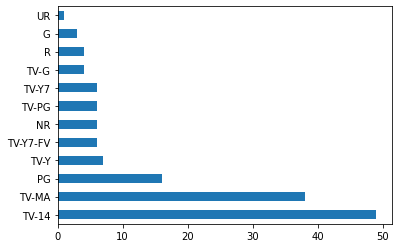

In [110]:
shows_2016['rating'].value_counts().plot(kind='barh')

*Most of the shows released in 2016 were TV-14*

In [111]:
shows_2016['user rating score'].mean()

83.97945205479452

*Mean rating of shows released in 2016*

In [112]:
shows

,title,rating,ratingDescription,ratingLevel,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,83.5,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,83.5,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,83.5,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,83.5,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,83.5,82


In [117]:
shows=shows.rename(columns={'ratingLevel':'ratingDescription','ratingDescription':'ratingLevel'})

*The column name was mis-matched*

In [118]:
shows.reset_index()

,index,title,rating,ratingDescription,ratingLevel,release year,user rating score,user rating size
0,0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,83.5,82
2,2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...,...
495,989,Russell Madness,PG,some rude humor and sports action,60,2015,83.5,82
496,993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,83.5,82
497,994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,83.5,82
498,997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,83.5,82


In [119]:
years=shows['release year'].unique()
ratings_per_year=[]
ind=[]
for i in years:
    ind.append(i)
    temp=shows[shows['release year']==i]['user rating score'].mean()
    ratings_per_year.append(temp)
df=pd.DataFrame(ratings_per_year,index=ind,columns=['Ratings'])
df=df.sort_index()

<AxesSubplot:>

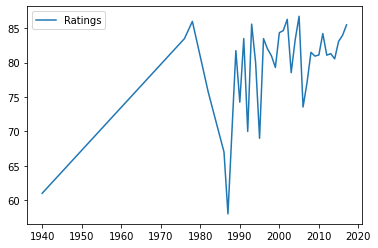

In [120]:
df.plot(kind='line')

*This graph shows the average ratings of all the shows released in a perticular year. We can infer that the average ratings increased steadily from 1940 to 1980 and there was a decrease in ratings between 1980 to 1990. The graph is very irregular.*